In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from matplotlib import pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


5


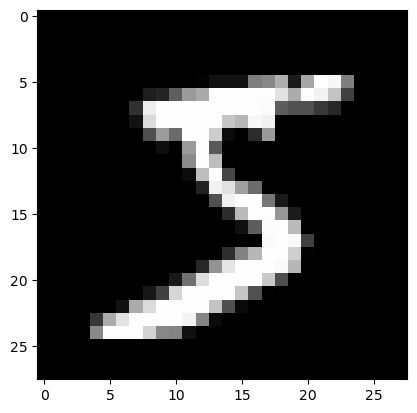

In [8]:
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0


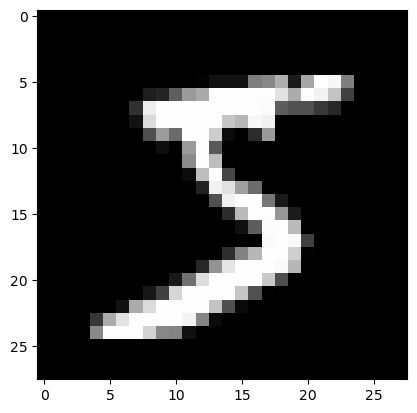

In [15]:
#even after normalization or scaling just above ,nothing changed in image below.
plt.imshow(x_train[0],cmap='gray')



In [16]:
#model building
model=Sequential([
 Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
 MaxPool2D((2,2)),
 Conv2D(32,(3,3),activation='relu'),
 MaxPool2D((2,2)),
 Conv2D(32,(3,3),activation='relu'),
 MaxPool2D((2,2)),
 Flatten(),
 Dense(32,activation='relu'),
 Dense(10,activation='softmax')
])


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 32)        

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [21]:
#training the model
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.3183 - Accuracy: 0.9010 - val_loss: 0.1436 - val_Accuracy: 0.9547
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1138 - Accuracy: 0.9650 - val_loss: 0.0844 - val_Accuracy: 0.9723
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0846 - Accuracy: 0.9738 - val_loss: 0.0707 - val_Accuracy: 0.9784
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0659 - Accuracy: 0.9798 - val_loss: 0.0725 - val_Accuracy: 0.9790
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0561 - Accuracy: 0.9824 - val_loss: 0.0638 - val_Accuracy: 0.9806
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0476 - Accuracy: 0.9849 - val_loss: 0.0568 - val_Accuracy: 0.9836
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0414 - Accuracy: 0.9866 - val_loss: 0.0562 - val_Ac

In [22]:
#Evaluation
model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0566 - Accuracy: 0.9838


[0.056642986834049225, 0.9837999939918518]

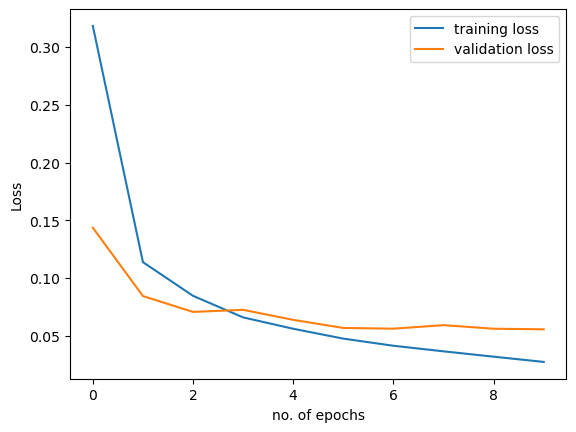

In [35]:
#'loss' should be all written as small letters
#'loss' for just to display on screen, u can use any of capital or small letters

plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.xlabel('no. of epochs')
plt.ylabel('Loss')
plt.legend(['training loss','validation loss'])
plt.show()

In [36]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

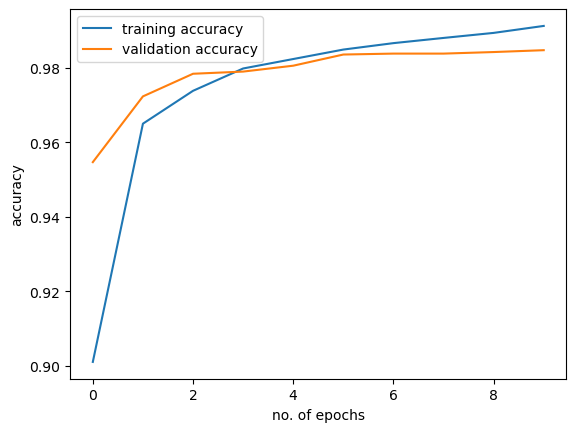

In [37]:
#here,'Accuracy' must be start with capital A after get() function
#other 'accuracy' need not start with capital A as there are just to display on screen 

plt.plot(history.history.get('Accuracy'))
plt.plot(history.history.get('val_Accuracy'))
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy','validation accuracy'])
plt.show()

In [38]:
model.layers

In [40]:
PATH='./check/CNN_MODEL.h5'

In [41]:
model.save(PATH)
print(f"model saved at: {PATH}")

model saved at: ./check/CNN_MODEL.h5
